In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt("../../../Downloads/data.txt", delimiter = ",")

In [41]:
data[:5]

array([[  1500., 158900.],
       [  1700., 169850.],
       [  1750., 178950.],
       [  1800., 178650.],
       [  1820., 180000.]])

### create independent and target variables

In [45]:
X = data[:, 0]

# Extract the second column (index 1) from data and reshape it into a column vector
# data[:, 1] gives us a 1D array of shape (n,)
# .reshape(Y.size, 1) converts it to a 2D column vector of shape (n, 1)
# This ensures Y has the proper shape for matrix multiplication in linear regression

Y = data[:, 1].reshape(Y.size, 1)

In [47]:
# Add a column of ones to X for the bias term (intercept θ₂)
# np.ones((X.size, )) creates a row of ones with same length as X
# np.vstack stacks the ones on top of X values vertically
# .T transposes the result to get shape (m, 2) where first column is all 1s, second is X values
# Final shape: [[1, x₁], [1, x₂], [1, x₃], ...] - ready for matrix multiplication with theta

X = np.vstack((np.ones((X.size, )), X)).T

In [19]:
print(X.shape)
print(Y.shape)

(45, 2)
(45, 1)


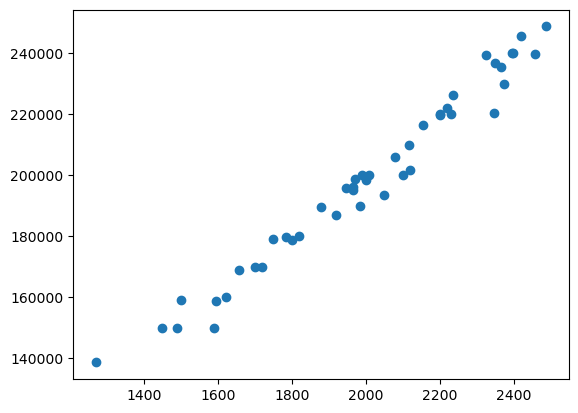

In [51]:
plt.scatter(X[:, 1], Y)

# Overview of Linear Regression

## Straight Line

y = θ₁x₁ + θ₂

## Cost Function

y_pred = matrix_mul(X, theta)

cost = 1/(2m) Σ[(y_pred - Y)²]

## Gradient Descent

d_theta = 1/m [matrix_mul(Xᵀ, y_pred - Y)]

theta = theta - α * d_theta

In [69]:
def model(X, Y, learning_rate, iteration):
    # Get number of training examples (m)
    m = Y.size
    
    # Initialize theta (parameters) as a column vector of zeros
    # theta[0] = θ₁ (slope), theta[1] = θ₂ (intercept)
    theta = np.zeros((2, 1))
    cost_list = []
    
    # Training loop - repeat gradient descent for specified iterations
    for i in range(iteration):
        # Forward pass: compute predictions using current theta
        # y_pred = X @ theta calculates θ₁*x + θ₂ for all training examples
        y_pred = np.dot(X, theta)
        
        # Calculate cost (Mean Squared Error / 2)
        # Measures how far our predictions are from actual values
        # Formula: (1/2m) * Σ(y_pred - Y)²
        cost = (1/(2*m)) * np.sum(np.square(y_pred - Y))
        
        # Calculate gradient (derivative of cost with respect to theta)
        # This tells us which direction to adjust theta to reduce cost
        # Formula: (1/m) * Xᵀ(y_pred - Y)
        d_theta = (1/m) * np.dot(X.T, y_pred - Y)
        
        # Update theta using gradient descent
        # Move theta in opposite direction of gradient (hence the minus sign)
        # learning_rate controls the step size
        theta = theta - learning_rate * d_theta

        cost_list.append(cost)
    
    # Return the optimized parameters after training
    return theta, cost_list

In [106]:
# Set hyperparameters and train the model

iteration = 100  # Number of gradient descent iterations
learning_rate = 0.00000005  # Step size for parameter updates (tune if cost doesn't decrease)
theta, cost_list = model(X, Y, learning_rate=learning_rate, iteration=iteration)

In [108]:
np.dot([1, 1567], theta)

array([155746.83577767])

In [110]:
new_houses = np.array([[1, 1547], [1, 1896], [1, 1934], [1, 2800], [1, 3400], [1, 5000]])

for house in new_houses:
    print("Price prediction for the house of", house[1], "sq. ft. area as :", np.dot([1, house[1]], theta), "$")

Price prediction for the house of 1547 sq. ft. area as : [153759.00187626] $
Price prediction for the house of 1896 sq. ft. area as : [188446.70345587] $
Price prediction for the house of 1934 sq. ft. area as : [192223.58786855] $
Price prediction for the house of 2800 sq. ft. area as : [278296.79579963] $
Price prediction for the house of 3400 sq. ft. area as : [337931.81284195] $
Price prediction for the house of 5000 sq. ft. area as : [496958.5249548] $


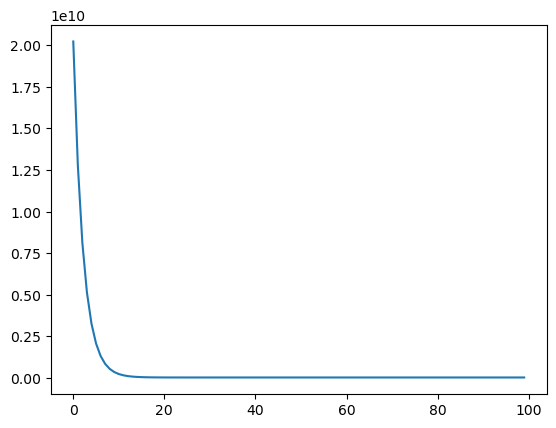

In [112]:
#np.arange() creates an array of evenly spaced values within a specified range.
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()

#plot show how our cost decreases with each iteration